In [1]:
import torch
import imageio
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.utils.data import Dataset
import torch.optim as optim


## CNN

## params

In [2]:
crop_size = 300
learning_rate = 0.01
num_epochs = 501


## read image

/var/folders/rt/hdfvhf8d2bv44gz1j9pcy5700000gn/T/ipykernel_76547/1965883659.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('./ca.jpg')[..., :3] / 255.0


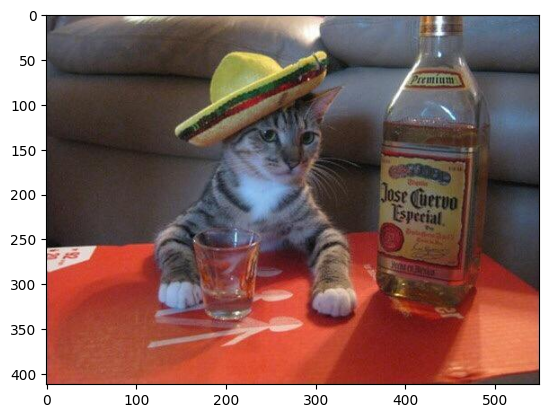

(412, 550, 3)


In [3]:
img = imageio.imread('./ca.jpg')[..., :3] / 255.0
# img_data = ImageData(img)
# img = (img * 255).astype(np.uint8)
plt.imshow(img)
plt.show()

print(img.shape)


## convert to tensor

In [4]:
# make tensor and (channel, height, width)
img_tensor = torch.Tensor(img).permute(2, 0, 1)
img_crop = transforms.CenterCrop(crop_size)(img_tensor)
# img_crop = img_crop.permute(1, 2, 0)
# img_crop.detach().numpy()
# img_crop.shape


# plt.imshow(img_crop)
# plt.show()

## flatten tensor to [crop_size ** 2, 3]


In [ ]:
# for mlp
# img_flat = torch.reshape(img_crop, (crop_size * crop_size, 3))
# img_flat.shape

In [ ]:
img_crop.shape

## create the mesh grid

In [ ]:
# for mlp
# xy_range = list(map(lambda x: x / crop_size, range(0, crop_size)))
# xy_range_tensor = torch.tensor(xy_range, dtype=torch.float32)
# x_grid, y_grid = torch.meshgrid(xy_range_tensor, xy_range_tensor)
# xy_coord_tensor = torch.stack((x_grid, y_grid), dim = -1)
# xy_flat = torch.reshape(xy_coord_tensor, (crop_size * crop_size, 2))
# xy_flat.shape

In [5]:
# for CNN
xy_range = list(map(lambda x: x / crop_size, range(0, crop_size)))
xy_range_tensor = torch.tensor(xy_range, dtype=torch.float32)
x_grid, y_grid = torch.meshgrid(xy_range_tensor, xy_range_tensor)
xy_coord_tensor = torch.stack((x_grid, y_grid), dim = -1)
xy_coord_tensor = xy_coord_tensor.unsqueeze(0).permute(0, 3, 1, 2)
xy_coord_tensor.shape

/Users/yerin/.pyenv/versions/3.9.13/envs/py3.9.13/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


torch.Size([1, 2, 300, 300])

## mlp

In [ ]:
# class MLP(nn.Module):
#     def __init__(self, in_features, hidden_features, out_features):
#         super().__init__()

#         self.flatten = nn.Flatten()

#         self.neural_net = nn.Sequential(
            
#             # layer 1
#             nn.Linear(in_features, hidden_features),
#             nn.ReLU(),
#             nn.Dropout(p = 0.5),

#             # layer 2
#             nn.Linear(hidden_features, hidden_features),
#             nn.ReLU(),
#             nn.Dropout(p = 0.5),

#             # layer 3
#             nn.Linear(hidden_features, out_features),
#             nn.Sigmoid()

#         )

#     def forward(self, x):
#         return self.neural_net(x)


In [ ]:
# class MLP(torch.nn.Module):
#     def __init__(
#         self,
#         in_features: int,
#         hidden_features: int,
#         hidden_layers: int,
#         out_features: int
#     ):
#         super().__init__()
#         out_features = out_features if out_features is not None else hidden_features
#         self.net = torch.nn.Sequential(
#             torch.nn.Linear(in_features, hidden_features),
#             torch.nn.ReLU(),
#             *[torch.nn.Sequential(
#                 torch.nn.Linear(hidden_features, hidden_features),
#                 torch.nn.ReLU()
#             ) for _ in range(hidden_layers)],
#             torch.nn.Linear(hidden_features, out_features)
#         )
#     def forward(self, x: torch.Tensor):
#         return self.net(x)


In [6]:

model = nn.Sequential(
        nn.Conv2d(
            2,
            300,
            kernel_size=1,
            padding=0),
        nn.ReLU(),
        nn.BatchNorm2d(300),

        nn.Conv2d(
            300,
            300,
            kernel_size=1,
            padding=0),
        nn.ReLU(),
        nn.BatchNorm2d(300),

        nn.Conv2d(
            300,
            300,
            kernel_size=1,
            padding=0),
        nn.ReLU(),
        nn.BatchNorm2d(300),

        nn.Conv2d(
            300,
            3,
            kernel_size=1,
            padding=0),
        nn.Sigmoid(),

    )

## Declare network

In [ ]:
# for mlp
# net = MLP(in_features=2, hidden_features=300, out_features=3)
# net

In [ ]:
# net = MLP(in_features=2, hidden_features=256, hidden_layers=2, out_features=3)

## train

/Users/yerin/.pyenv/versions/3.9.13/envs/py3.9.13/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([3, 300, 300])) that is different to the input size (torch.Size([1, 3, 300, 300])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, loss = 0.032
(300, 300, 3)
[[ 63  64  66]
 [ 67  68  70]
 [ 71  72  74]
 [ 75  77  79]
 [ 81  83  85]
 [ 87  88  90]
 [ 92  94  96]
 [ 97  99 101]
 [102 104 106]
 [107 109 110]
 [111 112 114]
 [115 116 118]
 [119 120 121]
 [122 124 125]
 [126 127 128]
 [128 129 130]
 [131 132 132]
 [133 134 134]
 [135 136 136]
 [137 137 138]
 [139 139 140]
 [140 141 141]
 [142 142 143]
 [144 144 144]
 [145 145 146]
 [146 146 146]
 [146 147 147]
 [147 147 147]
 [147 147 147]
 [147 147 147]
 [147 147 147]
 [147 147 147]
 [147 147 147]
 [147 147 147]
 [146 146 146]
 [145 145 145]
 [144 144 144]
 [143 143 143]
 [142 142 142]
 [142 142 141]
 [141 141 141]
 [141 141 141]
 [140 140 140]
 [140 140 139]
 [139 139 139]
 [138 138 138]
 [137 137 137]
 [136 136 135]
 [135 134 134]
 [134 133 133]
 [132 132 132]
 [131 131 130]
 [130 130 129]
 [129 128 128]
 [128 127 127]
 [126 126 126]
 [126 125 125]
 [125 125 125]
 [125 125 124]
 [124 124 124]
 [124 124 124]
 [124 124 124]
 [124 123 123]
 [123 123 123]
 [12

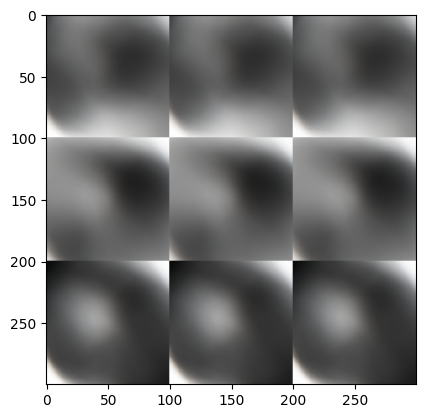

Epoch 100, loss = 0.010
(300, 300, 3)
[[ 41  41  41]
 [ 41  41  41]
 [ 41  41  42]
 [ 42  42  42]
 [ 42  42  42]
 [ 43  43  43]
 [ 43  44  44]
 [ 44  44  45]
 [ 45  45  46]
 [ 46  46  47]
 [ 47  48  48]
 [ 49  49  50]
 [ 50  51  51]
 [ 52  52  53]
 [ 53  54  54]
 [ 55  55  56]
 [ 56  57  58]
 [ 58  59  59]
 [ 60  61  63]
 [ 65  68  69]
 [ 71  75  81]
 [ 88  95 102]
 [110 118 126]
 [133 140 146]
 [148 149 151]
 [152 154 155]
 [157 158 159]
 [160 162 163]
 [164 165 166]
 [168 169 170]
 [171 172 173]
 [174 175 177]
 [178 179 180]
 [181 182 183]
 [184 185 186]
 [186 187 188]
 [189 190 191]
 [192 193 194]
 [195 196 197]
 [198 199 200]
 [200 201 202]
 [203 204 205]
 [206 207 208]
 [208 209 210]
 [211 211 211]
 [211 211 210]
 [210 210 210]
 [210 210 210]
 [210 210 210]
 [208 206 204]
 [201 197 192]
 [188 183 178]
 [173 168 163]
 [157 151 144]
 [138 130 122]
 [115 108 101]
 [ 96  93  91]
 [ 89  86  84]
 [ 82  80  78]
 [ 76  74  72]
 [ 70  68  67]
 [ 65  63  62]
 [ 60  59  57]
 [ 56  55  53]
 [

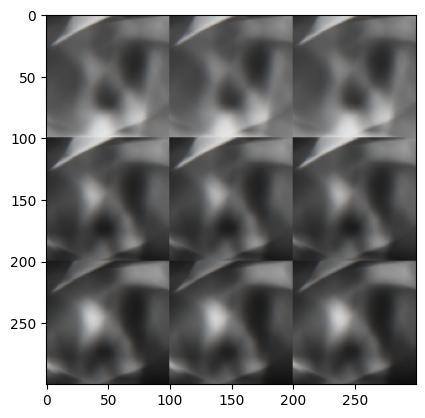

Epoch 200, loss = 0.007
(300, 300, 3)
[[ 58  58  58]
 [ 58  58  58]
 [ 57  57  57]
 [ 57  58  58]
 [ 58  58  58]
 [ 58  59  59]
 [ 59  60  60]
 [ 60  61  61]
 [ 61  62  62]
 [ 62  62  62]
 [ 62  63  63]
 [ 63  63  63]
 [ 63  63  63]
 [ 64  64  64]
 [ 64  64  64]
 [ 64  65  65]
 [ 65  65  65]
 [ 65  66  66]
 [ 66  67  67]
 [ 68  69  69]
 [ 70  74  81]
 [ 88  96 104]
 [113 122 131]
 [140 148 155]
 [155 156 156]
 [156 156 156]
 [156 156 156]
 [155 155 155]
 [154 154 154]
 [153 152 152]
 [151 151 150]
 [150 150 151]
 [151 152 153]
 [153 154 155]
 [156 157 158]
 [159 161 162]
 [163 165 166]
 [167 169 170]
 [172 173 175]
 [176 177 179]
 [180 182 184]
 [186 188 190]
 [192 192 193]
 [193 193 194]
 [194 194 195]
 [195 195 195]
 [195 196 197]
 [197 196 195]
 [194 193 192]
 [191 190 189]
 [188 186 183]
 [179 175 170]
 [165 160 154]
 [147 139 131]
 [123 114 106]
 [ 99  91  84]
 [ 77  76  73]
 [ 71  69  68]
 [ 67  66  65]
 [ 63  61  59]
 [ 58  56  54]
 [ 52  51  49]
 [ 48  46  44]
 [ 43  42  41]
 [

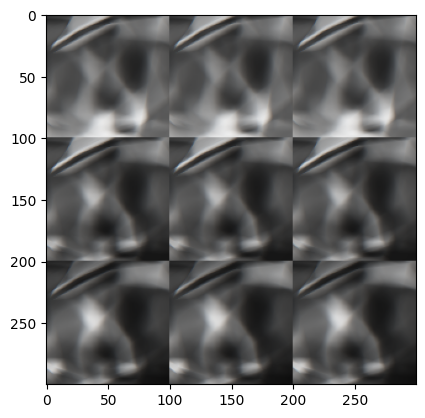

Epoch 300, loss = 0.006
(300, 300, 3)
[[ 55  55  55]
 [ 55  55  56]
 [ 56  56  56]
 [ 56  56  56]
 [ 57  57  58]
 [ 58  58  59]
 [ 59  60  60]
 [ 60  60  61]
 [ 61  61  62]
 [ 62  62  63]
 [ 63  63  63]
 [ 63  63  63]
 [ 64  64  64]
 [ 65  65  66]
 [ 66  67  67]
 [ 68  68  68]
 [ 69  69  69]
 [ 70  70  70]
 [ 70  71  71]
 [ 71  71  72]
 [ 73  73  74]
 [ 79  87  97]
 [107 119 131]
 [142 153 164]
 [163 162 161]
 [161 161 161]
 [160 160 160]
 [160 159 159]
 [159 159 158]
 [158 158 157]
 [157 157 157]
 [157 157 158]
 [159 160 162]
 [163 164 166]
 [167 169 171]
 [172 175 177]
 [180 183 185]
 [188 190 193]
 [195 198 200]
 [202 204 206]
 [208 210 212]
 [214 216 218]
 [219 221 222]
 [222 222 222]
 [222 221 221]
 [221 221 218]
 [216 213 210]
 [208 208 208]
 [208 207 207]
 [208 208 209]
 [210 207 204]
 [200 196 191]
 [186 180 173]
 [166 157 148]
 [138 128 118]
 [108  99  91]
 [ 84  79  73]
 [ 68  69  70]
 [ 70  71  71]
 [ 68  66  64]
 [ 61  59  56]
 [ 54  51  49]
 [ 46  44  42]
 [ 42  41  41]
 [

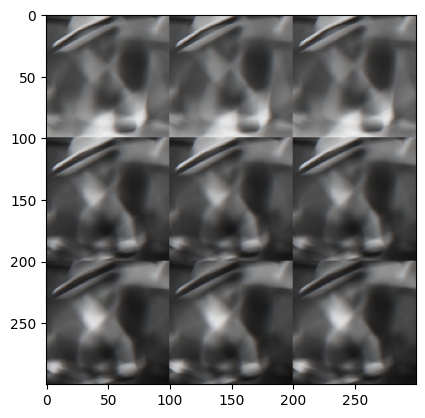

Epoch 400, loss = 0.005
(300, 300, 3)
[[ 50  50  50]
 [ 50  50  51]
 [ 51  51  51]
 [ 52  52  52]
 [ 52  53  53]
 [ 53  53  54]
 [ 54  54  55]
 [ 55  56  56]
 [ 56  57  57]
 [ 58  58  58]
 [ 59  59  59]
 [ 59  59  60]
 [ 60  60  60]
 [ 60  60  61]
 [ 61  61  61]
 [ 62  62  62]
 [ 63  63  63]
 [ 63  63  63]
 [ 63  63  63]
 [ 64  64  65]
 [ 65  66  66]
 [ 66  70  78]
 [ 89 101 114]
 [127 139 148]
 [150 150 149]
 [149 149 148]
 [148 147 147]
 [146 146 145]
 [145 144 144]
 [143 143 143]
 [142 142 142]
 [141 141 141]
 [141 141 141]
 [142 144 146]
 [148 150 151]
 [153 155 157]
 [159 162 165]
 [168 171 175]
 [178 181 184]
 [186 189 192]
 [195 198 201]
 [204 207 209]
 [212 214 216]
 [218 218 217]
 [217 217 215]
 [212 208 203]
 [199 197 195]
 [194 192 191]
 [189 187 187]
 [189 191 194]
 [196 192 187]
 [182 176 169]
 [162 154 145]
 [135 124 112]
 [100  89  80]
 [ 73  68  63]
 [ 58  55  55]
 [ 56  57  57]
 [ 57  57  57]
 [ 55  52  50]
 [ 48  46  44]
 [ 42  39  38]
 [ 36  34  34]
 [ 33  33  33]
 [

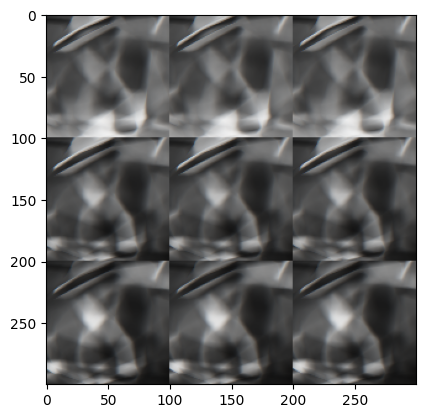

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [ ]:
# for mlp
criterion = nn.MSELoss()

# model = net

# target = img_flat

# for cnn
target = img_crop

optimizer = optim.Adam(model.parameters(), lr=learning_rate) 

for epoch in range(num_epochs):

    model.train()

    # for mlp
    # generated = model(xy_flat)

    # for cnn
    generated = model(xy_coord_tensor)

    loss = criterion(generated, target)
    # loss = nn.functional.l1_loss(generated, target)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch %d, loss = %.03f' % (epoch, float(loss)))
        # print(generated.shape)
        generated = generated.reshape((crop_size, crop_size, 3)).detach().numpy()
        # generated = generated * 255
        # print(generated[0])
        generated = (generated * 255).astype(np.uint8)
        print(generated.shape)
        # generated = (generated - generated.min()) / (generated.max() - generated.min())
        print(generated[0])

        plt.close()
        plt.figure()
        plt.imshow(generated)
        plt.show()
        plt.clf()
model.eval()

## MLP

/var/folders/rt/hdfvhf8d2bv44gz1j9pcy5700000gn/T/ipykernel_76547/2517324908.py:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('ca.jpg')[..., :3] / 255.0


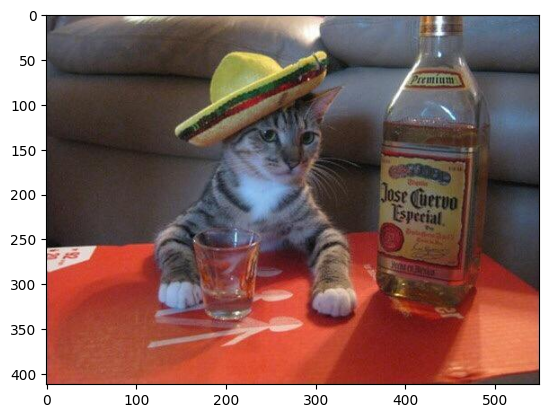

img_crop: torch.Size([3, 300, 300])
img_flat: torch.Size([90000, 3])
xy_coord_tensor: torch.Size([2, 300, 300])
xy_flat: torch.Size([90000])
Epoch 0, loss = 0.211
generated: [[[0.5909625  0.5550877  0.50844693]
  [0.5497431  0.5020121  0.5405944 ]
  [0.54048455 0.40232974 0.6868257 ]
  ...
  [0.5504447  0.48654675 0.49368468]
  [0.5328963  0.5478001  0.50980896]
  [0.59048796 0.5402512  0.42689326]]

 [[0.5107119  0.48911148 0.5994067 ]
  [0.4557845  0.49539778 0.5420715 ]
  [0.5868436  0.54679286 0.5302087 ]
  ...
  [0.5154587  0.5321455  0.5516653 ]
  [0.59854805 0.50794727 0.5551821 ]
  [0.55743265 0.5302614  0.55530554]]

 [[0.5695941  0.4834831  0.54110324]
  [0.47754365 0.46052524 0.55199885]
  [0.52849686 0.45106465 0.41690895]
  ...
  [0.50128645 0.43180266 0.7007613 ]
  [0.4301199  0.517428   0.5424328 ]
  [0.48037454 0.49163997 0.61306375]]

 ...

 [[0.59260076 0.44577348 0.48029348]
  [0.5446925  0.54379344 0.5731375 ]
  [0.50533634 0.45636687 0.53464395]
  ...
  [0.53137   

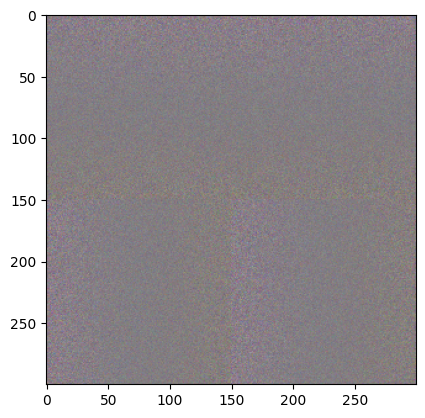

KeyboardInterrupt: 

In [36]:
import torch
import imageio
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.utils.data import Dataset
import torch.optim as optim

# params
crop_size = 300
learning_rate = 0.01
num_epochs = 501

# read image
img = imageio.imread('ca.jpg')[..., :3] / 255.0
# img_data = ImageData(img)
# img = (img * 255).astype(np.uint8)
plt.imshow(img)
plt.show()

# print(img.shape)

# convert to tensor

# make tensor and (channel, height, width)
img_tensor = torch.Tensor(img).permute(2, 0, 1)
img_crop = transforms.CenterCrop(crop_size)(img_tensor)

print(f'img_crop: {img_crop.shape}')

# calc mean and std for normalization
# mean = img_crop.mean(dim=[1,2])
# std = img_crop.std(dim=[1,2])

# normalize
# normalize = transforms.Normalize(mean=mean.tolist(), std=std.tolist())

# img_crop = img_crop.permute(1, 2, 0)
# img_crop.detach().numpy()
# img_crop.shape


# plt.imshow(img_crop)
# plt.show()

# flatten tensor
# img_normalize = normalize(img_crop)
# img_flat = torch.reshape(img_normalize, (crop_size * crop_size, 3))
img_flat = torch.reshape(img_crop, (crop_size * crop_size, 3))

# min_val = img_flat.min()
# max_val = img_flat.max()

# img_flat = (img_flat - min_val) / (max_val - min_val) * 2 - 1

print(f'img_flat: {img_flat.shape}')

# create the mesh grid
xy_range = list(map(lambda x: x / crop_size, range(0, crop_size)))
xy_range_tensor = torch.tensor(xy_range, dtype=torch.float32)
x_grid, y_grid = torch.meshgrid(xy_range_tensor, xy_range_tensor)
xy_coord_tensor = torch.stack((x_grid, y_grid), dim = -1)
xy_coord_tensor = xy_coord_tensor.permute(2, 0, 1)



print(f'xy_coord_tensor: {xy_coord_tensor.shape}')

# # calc mean and std for normalization
mean = xy_coord_tensor.mean(dim=[1,2])
std = xy_coord_tensor.std(dim=[1,2])

# # normalize
normalize = transforms.Normalize(mean=mean.tolist(), std=std.tolist())
xy_coord_tensor_normalize = normalize(xy_coord_tensor)

xy_flat = torch.reshape(xy_coord_tensor_normalize, (crop_size * crop_size, 2))


min_val = xy_flat.min()
max_val = xy_flat.max()

xy_flat = (xy_flat - min_val) / (max_val - min_val) * 2 - 1

print(f'xy_flat: {xy_flat[...,0].shape}')

# mlp
class MLP(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        super().__init__()

        # self.flatten = nn.Flatten()

        self.neural_net = nn.Sequential(
            
            # layer 1
            nn.Linear(in_features, hidden_features),
            nn.ReLU(),
            nn.Dropout(p = 0.5),

            # layer 2
            nn.Linear(hidden_features, hidden_features),
            nn.ReLU(),
            nn.Dropout(p = 0.5),

            # layer 3
            nn.Linear(hidden_features, out_features),
            nn.Sigmoid()

        )

    def forward(self, x):
        return self.neural_net(x)

# declare network
net = MLP(in_features=2, hidden_features=300, out_features=3)

# criterion = nn.MSELoss()

model = net

target = img_flat

optimizer = optim.Adam(model.parameters(), lr=learning_rate) 

for epoch in range(num_epochs):

    model.train()

    # for mlp
    generated = model(xy_flat)

    # for ted = model(xy_coord_tensor)

    # loss = criterion(generated, target)
    loss = nn.functional.l1_loss(generated, target)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch %d, loss = %.03f' % (epoch, float(loss)))
        # print(generated.shape)
        generated = generated.view((crop_size, crop_size, 3)).detach().numpy()
        # generated = generated * 255
        print(f'generated: {generated}')
        # generated = (generated * 255).astype(np.uint8)
        # generated = (generated - generated.min()) / (generated.max() - generated.min())
        # print(generated)
        plt.imshow(generated)
        plt.show()
model.eval()




